# Part I: Theory
## Question a)
Using Taylor expansion we have the two following results: $\exists \xi \in ]-h; h[ $ such that,
$$ f(h) = f(0) + f'(0)h + \frac{f''(0)h^2}{2} + f'''(\xi)\frac{h^3}{6} $$
$$ f(-h) = f(0) - f'(0)h + \frac{f''(0)h^2}{2} - f'''(\xi)\frac{h^3}{6} $$
And therefore we have the following equality:
$$ \tilde{D_h} = \frac{f(h) + \delta f(h) - f(-h) - \delta f(-h)}{2h} \\
\Leftrightarrow \tilde{D_h} = \frac{1}{2h}(f(h) - f(-h)) +  \frac{\delta f(h) - \delta f(-h)}{2h} \\
\Leftrightarrow \tilde{D_h} = \frac{1}{2h}(f(0) + f'(0)h + \frac{f''(0)h^2}{2} + f'''(\xi)\frac{h^3}{6} - f(0) + f'(0)h - \frac{f''(0)h^2}{2} - f'''(\xi)\frac{h^3}{6}) +  \frac{\delta f(h) - \delta f(-h)}{2h} \\
\Leftrightarrow \tilde{D_h} = \frac{1}{2h}(2f'(0)h + 2f'''(\xi)\frac{h^3}{6}) +  \frac{\delta f(h) - \delta f(-h)}{2h} \\
\Leftrightarrow \tilde{D_h} = f'(0) + f'''(\xi)\frac{h^2}{6} +  \frac{\delta f(h) - \delta f(-h)}{2h} \\
\Leftrightarrow \tilde{D_h} - f'(0) = f'''(\xi)\frac{h^2}{6} +  \frac{\delta f(h) - \delta f(-h)}{2h}$$

## Question b)
Applying absolute value we have the following:
$$ | \tilde{D_h} - f'(0) | = |f'''(\xi)\frac{h^2}{6}) +  \frac{\delta f(h) - \delta f(-h)}{2h}| \\
\Leftrightarrow |\tilde{D_h} - f'(0)| \leq |f'''(\xi)\frac{h^2}{6})| + |\frac{\delta f(h) - \delta f(-h)}{2h}| \\
\Leftrightarrow |\tilde{D_h} - f'(0)| \leq |f'''(\xi)|\frac{h^2}{6}) + \frac{|\delta f(h)| + |\delta f(-h)|}{2h} \\
$$
But we also have that $\forall x \in -a; a[, |\delta f(x)| \leq \epsilon$, and we can define $ M := \max\limits_{x\in]-a; a[} |f'''(x)| $, and thus we obtain:
$$ |\tilde{D_h} - f'(0)| \leq M\frac{h^2}{6} + \frac{\epsilon + \epsilon}{2h} \\
\Leftrightarrow |\tilde{D_h} - f'(0)| \leq M\frac{h^2}{6} + \frac{\epsilon}{h} $$

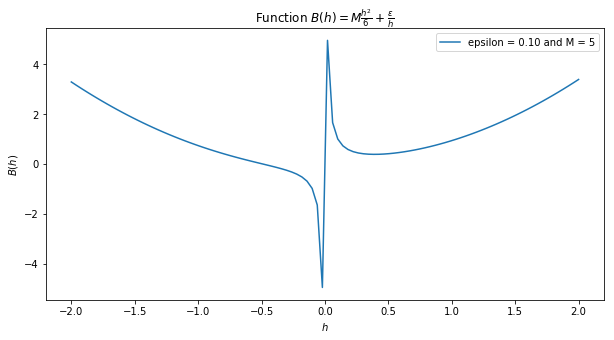

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import random as rn

hlist = np.linspace(-2, 2, 100)
eps = 0.1
M = 5

plt.figure(figsize=(10,5))
B = (M/6) * hlist**2 + eps / hlist 

plt.plot(hlist,B, label='epsilon = %.2f and M = %d' % (eps,M))

plt.title(r'Function $B(h) = M\frac{h^2}{6} + \frac{\epsilon}{h}$')
plt.xlabel(r'$h$')
plt.ylabel('$B(h)$')
plt.legend()
plt.show()

We can observe that the function is null for a negative h. We can thus solve the equation:
$$ M\frac{h^2}{6} + \frac{\epsilon}{h} = 0 \\
M\frac{h^2}{6} = - \frac{\epsilon}{h}\\
h = \sqrt[3]{\frac{-6\epsilon}{M}}$$
Let's study the derivative of the function B in order to minimize when h is positive: $ B'(h) = M\frac{h}{3} - \frac{\epsilon}{h^2}$. We want to find the minimum that is the point where the derivative is null for $h > 0$:
$$ M\frac{h}{3} - \frac{\epsilon}{h^2} = 0 \\
\Leftrightarrow M\frac{h}{3} = \frac{\epsilon}{h^2} \\
\Leftrightarrow M h^3 = 3\epsilon \\ 
\Leftrightarrow h = \sqrt[3]{\frac{3\epsilon}{M}} \\ $$
The function is minimized for $h = \sqrt[3]{\frac{3\epsilon}{M}}$ and null for $h = \sqrt[3]{\frac{-6\epsilon}{M}}$

# Part 2: Lab
## Lagrange Interpolation with uniformly spaces points

In [56]:
def LagrangeInterpolation(xlist, ylist):
    if len(xlist) != len(ylist): return 0
    def polynomial(x): 
        y = 0
        for i in range(len(xlist)):
            prod = 1
            for j in range(len(xlist)):
                if j != i:
                    prod *= (x - xlist[j])/(xlist[i] - xlist[j])
            y += ylist[i] * prod
        return y
    return polynomial       

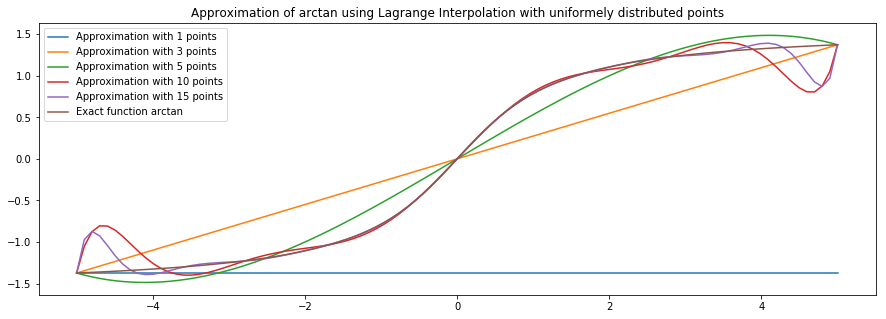

In [197]:
nb_points = [1, 3, 5, 10, 15]
interval = [-5, 5]

plt.figure(figsize=(15,5))

for n in nb_points:
    xpointslist = np.linspace(interval[0], interval[1], n)
    ypointslist = np.arctan(xpointslist)
    polynomial = LagrangeInterpolation(xpointslist, ypointslist)
    
    xlist = np.linspace(interval[0], interval[1], 100)
    ylist = []
    for x in xlist:
        ylist.append(polynomial(x))
    
    plt.plot(xlist,ylist, label='Approximation with %d points' % n)

xlist = np.linspace(interval[0], interval[1], 100)
tlist=[]
ylist = np.arctan(xlist)
plt.plot(xlist,ylist, label='Exact function arctan')

plt.title(r'Approximation of arctan using Lagrange Interpolation with uniformely distributed points')
plt.legend()
plt.show()

## Lagrange Interpolation with Chebyshev nodes

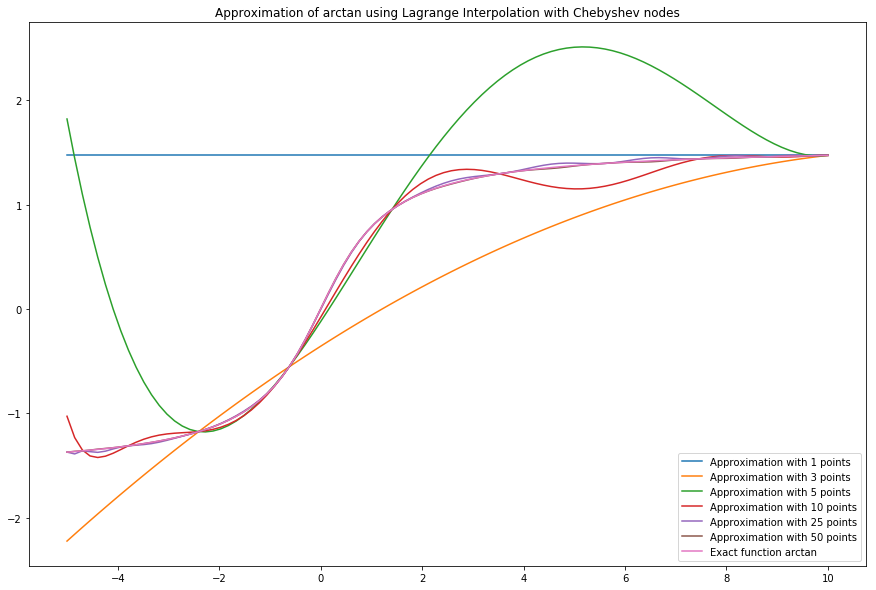

In [198]:
nb_points = [1, 3, 5, 10, 25, 50]
interval = [-5, 10]

plt.figure(figsize=(15,10))

def chebyshevNodes(n, interval):
    nodes = []
    for i in range(n):
        nodes.append(0.5*(interval[0]+interval[1])+0.5*(interval[1] - interval[0])*np.cos(2*i - 12*n*np.pi))
    return nodes

for n in nb_points:
    xpointslist = chebyshevNodes(n, interval)
    ypointslist = []
    for x in xpointslist:
        ypointslist.append(np.arctan(x))
    polynomial = LagrangeInterpolation(xpointslist, ypointslist)
    
    xlist = np.linspace(interval[0], interval[1], 100)
    ylist = []
    for x in xlist:
        ylist.append(polynomial(x))
    
    plt.plot(xlist,ylist, label='Approximation with %d points' % n)

xlist = np.linspace(interval[0], interval[1], 100)
tlist=[]
ylist = np.arctan(xlist)
plt.plot(xlist,ylist, label='Exact function arctan')

plt.title('Approximation of arctan using Lagrange Interpolation with Chebyshev nodes')
plt.legend()
plt.show()

## Bernstein interpolation on interval [0;1]

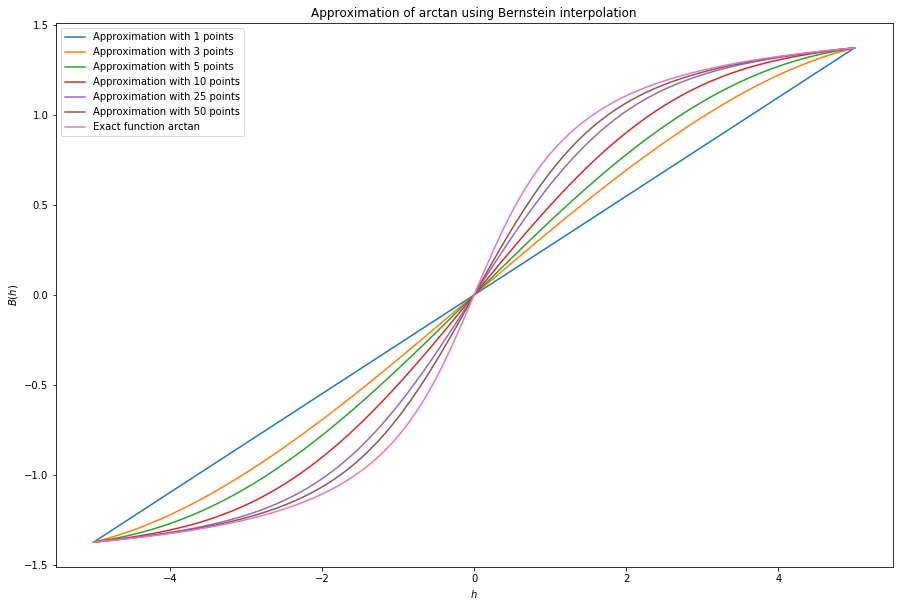

In [199]:
from scipy.special import comb

nb_points = [1, 3, 5, 10, 25, 50]
interval = [-5, 5]
diff = interval[1] - interval[0]

plt.figure(figsize=(15,10))

def points(n, interval):
    nodes = []
    for i in range(n+1):
        nodes.append(interval[0] + i*(interval[1] - interval[0])/n) #Map interval to [0;1]
    return nodes

def BernsteinInterpolation(ylist, n):
    def polynomial(x): 
        y=0
        for i in range(n+1):
            y += ylist[i]*comb(n, i, exact=True)*(((interval[1]+x)/diff)**i)*((1-((interval[1]+x)/diff))**(n-i)) 
            #Bernstein polynomials apply to the interval [0;1] so divide x by diff and add offset
        return y
    return polynomial   

for n in nb_points:
    xpointslist = points(n, interval)
    ypointslist = []
    for x in xpointslist:
        ypointslist.append(np.arctan(x))
    polynomial = BernsteinInterpolation(ypointslist, n)
    
    xlist = np.linspace(interval[0], interval[1], 100)
    ylist = []
    for x in xlist:
        ylist.append(polynomial(x))
    
    plt.plot(xlist,ylist, label='Approximation with %d points' % n)

xlist = np.linspace(interval[0], interval[1], 100)
tlist=[]
ylist = np.arctan(xlist)
plt.plot(xlist,ylist, label='Exact function arctan')

plt.title(r'Approximation of arctan using Bernstein interpolation')

plt.xlabel(r'$h$')
plt.ylabel('$B(h)$')
plt.legend()
plt.show()